# Excersise 2

In [2]:
# imports
import numpy as np
import pandas as pd
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pingouin as pg

c:\Users\A200083283\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
hh_marriage = pd.read_csv("../Data/h_marriage.csv")

In [33]:
hh_marriage['ownhh_transpose'] = hh_marriage['ownhh'] + np.random.normal(0, 0.1, hh_marriage.shape[0])
hh_marriage['getmar_transform'] = hh_marriage['getmar'] + np.random.normal(0, 0.1, hh_marriage.shape[0])


In [34]:
hh_marriage

,ownhh,getmar,ownhh_transpose,getmar_transpose,getmar_transform
0,2,4,1.868443,4.146356,4.007618
1,2,5,2.008739,4.812615,4.840715
2,3,3,3.063694,3.118217,3.183420
3,1,3,1.075164,2.934922,2.796859
4,2,3,1.964695,3.032268,2.802787
...,...,...,...,...,...
1341,5,2,5.088500,1.946677,2.136280
1342,2,4,1.989099,4.083992,4.030852
1343,2,1,1.955187,1.031770,1.139486
1344,1,2,1.059152,1.938924,2.074067


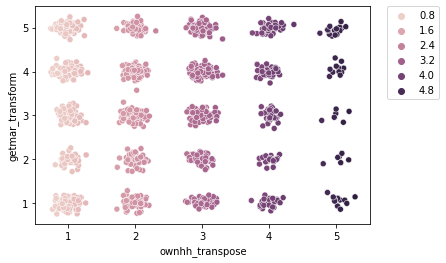

In [38]:
sns.scatterplot(data=hh_marriage, x="ownhh_transpose", y="getmar_transform", hue="ownhh_transpose")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [40]:
r_pearson, p_val = stats.pearsonr(hh_marriage['ownhh'], hh_marriage['getmar'])
print(f"Correlation is {r_pearson} \nP_value of the zero correlation test is {p_val}")


Correlation is 0.08056845733470745 
P_value of the zero correlation test is 0.0030969366051704543


In [43]:
pd.crosstab(hh_marriage.ownhh, hh_marriage.getmar, normalize='index')

getmar,1,2,3,4,5
ownhh,,,,,
1,0.239796,0.127551,0.211735,0.216837,0.204082
2,0.176781,0.168865,0.218997,0.266491,0.168865
3,0.145773,0.145773,0.233236,0.253644,0.221574
4,0.179775,0.117978,0.174157,0.247191,0.280899
5,0.240741,0.111111,0.111111,0.203704,0.333333


In [45]:
hh_marriage['diff'] = hh_marriage['ownhh'] - hh_marriage['getmar']

c:\Users\A200083283\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diff'>

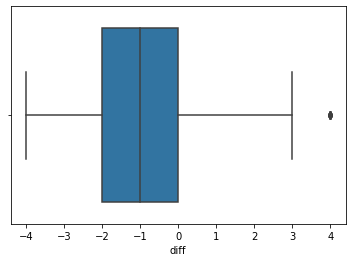

In [46]:
sns.boxplot(hh_marriage['diff'])

In [47]:
hh_marriage[['diff']].describe()

,diff
count,1346.000000
mean,-0.800892
std,1.742672
min,-4.000000
25%,-2.000000
50%,-1.000000
75%,0.000000
max,4.000000


<AxesSubplot:ylabel='Count'>

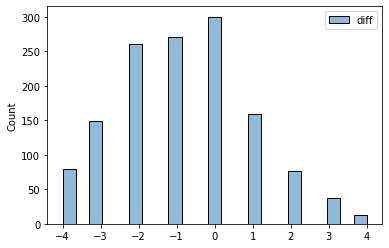

In [48]:
sns.histplot(hh_marriage[['diff']])

In [76]:
stats.ttest_ind(hh_marriage['ownhh'], hh_marriage['getmar'])

Ttest_indResult(statistic=-16.18198542419213, pvalue=2.818933279696128e-56)

In [78]:
stats.wilcoxon(hh_marriage['ownhh'], hh_marriage['getmar'])

WilcoxonResult(statistic=125911.0, pvalue=4.028596298277015e-53)

In [77]:
hh_marriage[['ownhh', 'getmar']].corr()

,ownhh,getmar
ownhh,1.000000,0.080568
getmar,0.080568,1.000000


## Task 05

In [49]:
crime = pd.read_csv("../Data/criminality.csv")

In [56]:
crime['state']= crime['state'].astype("str")

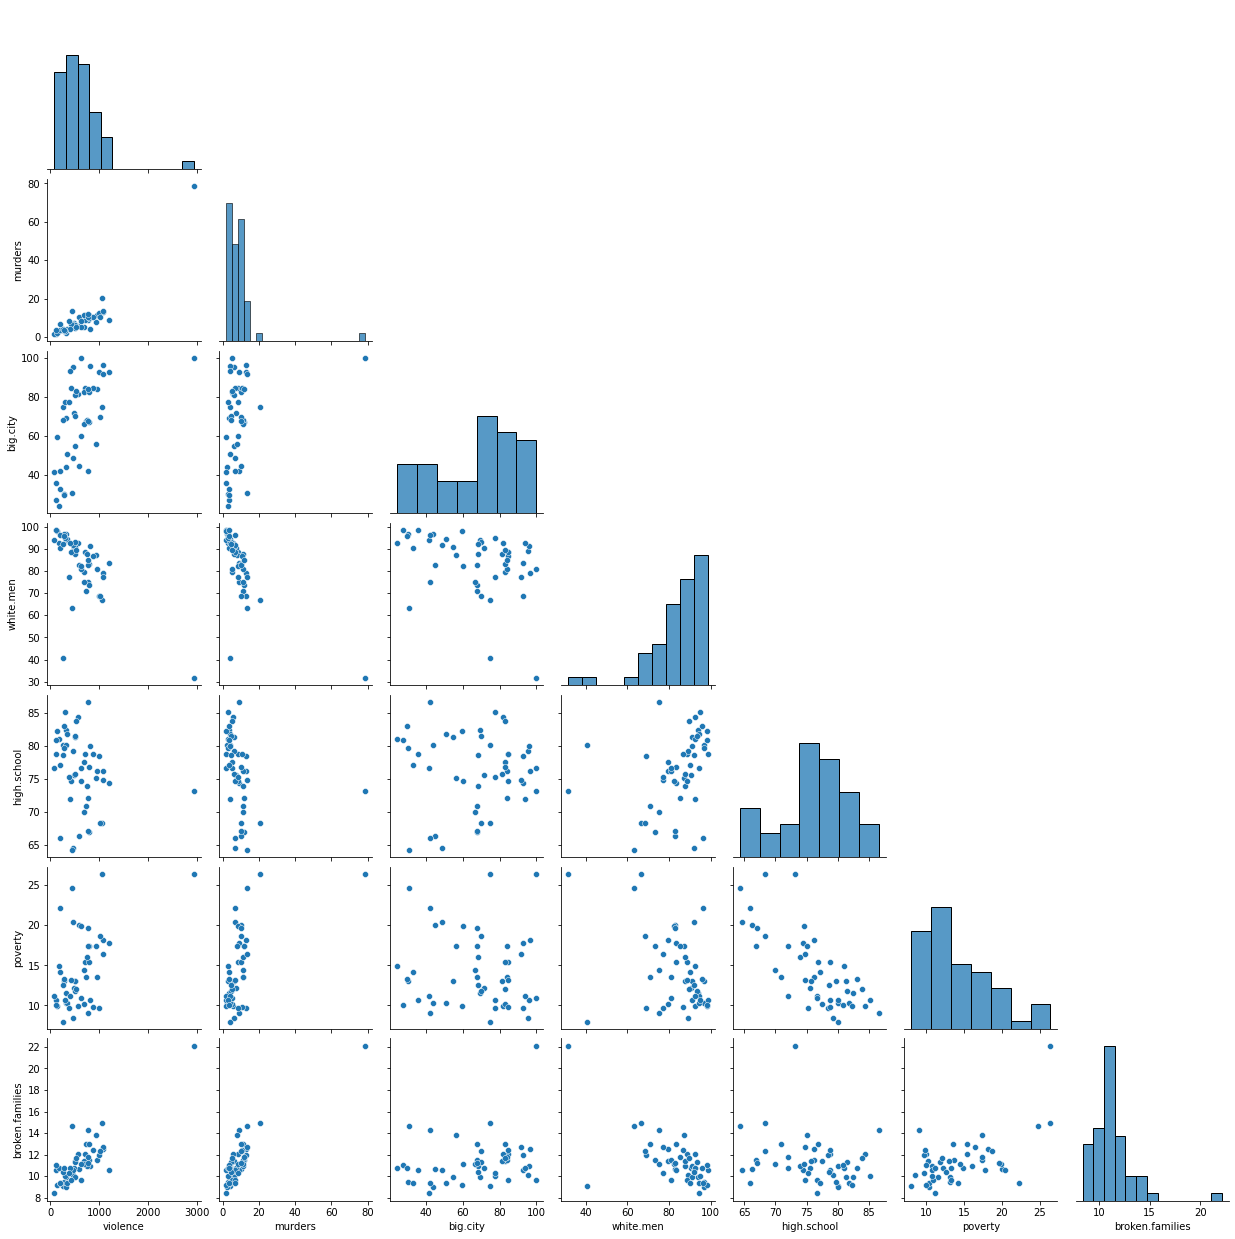

In [60]:
sns.pairplot(crime, corner=True)

<AxesSubplot:>

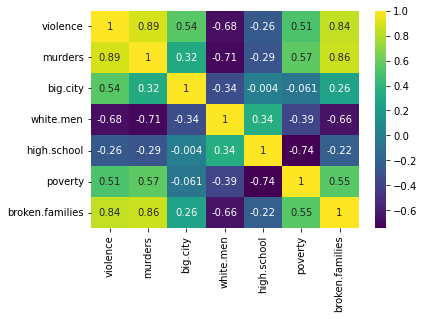

In [66]:
sns.heatmap(crime.corr(), annot=True, cmap="viridis")

In [61]:
crime.cov()

,violence,murders,big.city,white.men,high.school,poverty,broken.families
violence,194569.494902,4189.516392,5269.178431,-3959.434745,-631.596235,1030.281412,785.012078
murders,4189.516392,114.866431,74.390275,-100.315420,-17.145259,27.802353,19.529286
big.city,5269.178431,74.390275,482.115702,-98.191322,-0.488365,-6.093612,12.102455
white.men,-3959.434745,-100.315420,-98.191322,175.636337,25.058412,-23.641471,-18.463804
high.school,-631.596235,-17.145259,-0.488365,25.058412,31.271435,-19.071212,-2.607412
poverty,1030.281412,27.802353,-6.093612,-23.641471,-19.071212,21.015271,5.335271
broken.families,785.012078,19.529286,12.102455,-18.463804,-2.607412,5.335271,4.500737


In [62]:
crime.corr()

,violence,murders,big.city,white.men,high.school,poverty,broken.families
violence,1.000000,0.886196,0.544039,-0.677312,-0.256052,0.509508,0.838875
murders,0.886196,1.000000,0.316114,-0.706259,-0.286071,0.565871,0.858911
big.city,0.544039,0.316114,1.000000,-0.337435,-0.003977,-0.060538,0.259810
white.men,-0.677312,-0.706259,-0.337435,1.000000,0.338121,-0.389135,-0.656708
high.school,-0.256052,-0.286071,-0.003977,0.338121,1.000000,-0.743938,-0.219783
poverty,0.509508,0.565871,-0.060538,-0.389135,-0.743938,1.000000,0.548589
broken.families,0.838875,0.858911,0.259810,-0.656708,-0.219783,0.548589,1.000000
